# Task 3 - A/B Testing Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, shapiro, levene, chi2_contingency
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('C:/Users/Rohit Gupta/Downloads/Social_Network_Ads.csv')

In [3]:
print(df.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [4]:
print(df.shape)

(400, 5)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [6]:
print(df.describe())

            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [8]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


### No missing values are present in the given dataset.

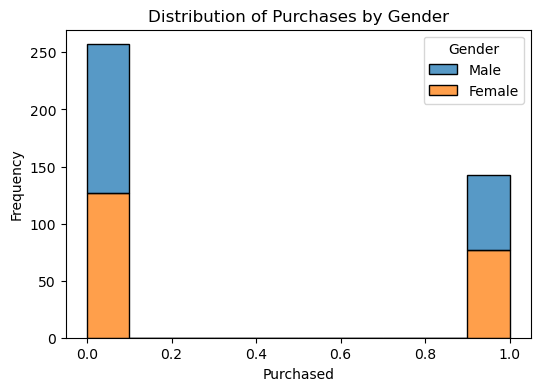

In [9]:
# I am comparing purchase rates between different genders (A/B test)
# A/B test on the 'Gender' column's impact on 'Purchased'
df['Purchased'] = df['Purchased'].astype(int)

# Visualize the data
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Purchased', hue='Gender', multiple='stack', kde=False)
plt.title('Distribution of Purchases by Gender')
plt.xlabel('Purchased')
plt.ylabel('Frequency')
plt.show()

### The female bar is taller than the male bar in the above plot. It looks like there are more females than males who made purchases.

# Statistical analysis of the data

In [11]:
# Summarizing the data
summary = df.groupby('Gender')['Purchased'].agg(['mean', 'std', 'count'])
print(summary)

# Checking for normality
stat, p_male = shapiro(df[df['Gender'] == 'Male']['Purchased'])
stat, p_female = shapiro(df[df['Gender'] == 'Female']['Purchased'])
print(f'P-value for normality test in males: {p_male}')
print(f'P-value for normality test in females: {p_female}')

# Checking for equal variances
stat, p_levene = levene(df[df['Gender'] == 'Male']['Purchased'], df[df['Gender'] == 'Female']['Purchased'])
print(f'P-value for Levene test for equal variances: {p_levene}')

# Performing the t-test
t_stat, p_val = ttest_ind(df[df['Gender'] == 'Male']['Purchased'], df[df['Gender'] == 'Female']['Purchased'], equal_var=(p_levene > 0.05))
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

# Interpreting the results
alpha = 0.05
if p_val < alpha:
    print('Reject the null hypothesis: There is a significant difference in purchase rates between the genders.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference in purchase rates between the genders.')

            mean       std  count
Gender                           
Female  0.377451  0.485942    204
Male    0.336735  0.473804    196
P-value for normality test in males: 3.352074913414594e-21
P-value for normality test in females: 3.499231677247163e-21
P-value for Levene test for equal variances: 0.3969320199449011
T-statistic: -0.8480281115892445
P-value: 0.3969320199450945
Fail to reject the null hypothesis: There is no significant difference in purchase rates between the genders.


### Normality test: It tests for whether the purchase rates within each gender group are normally distributed (follow a bell-shaped curve).
- The p-values (3.35e-21 for females and 3.49e-21 for males) are incredibly small, indicating that the purchase rates likely don't follow a perfect bell curve.

### Levene test: This line tests whether the variances (spread of data points) for purchase rates are equal between males and females.
- The p-value (0.3969) is greater than 0.05. This suggests that the variances in purchase rates are likely similar for males and females.

### T-statistic and p-value: This section compares the mean purchase rates between genders.
- The T-statistic (-0.848) is close to zero, indicating little difference in means.
- The p-value (0.3969) is again greater than 0.05. This means there's not enough evidence to say that the average purchase rate between genders is statistically significant.

### Overall purchase rates between genders are likely similar.

Chi2 Statistic: 0.5550869364098915
P-value (Chi-square test): 0.45624659183130645
Fail to reject the null hypothesis: There is no significant association between Gender and Purchased.


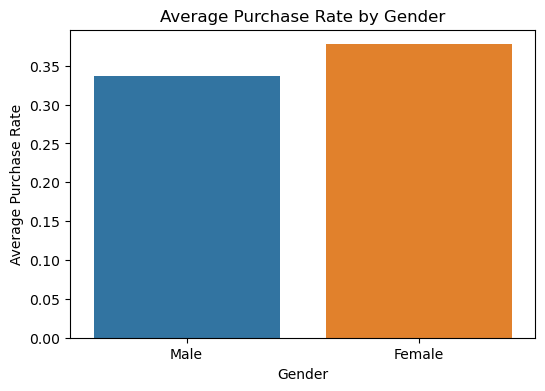

In [12]:
# performing Chi-square test for independence
contingency_table = pd.crosstab(df['Gender'], df['Purchased'])
chi2, p_chi, dof, expected = chi2_contingency(contingency_table)
print(f'Chi2 Statistic: {chi2}')
print(f'P-value (Chi-square test): {p_chi}')

if p_chi < alpha:
    print('Reject the null hypothesis: There is a significant association between Gender and Purchased.')
else:
    print('Fail to reject the null hypothesis: There is no significant association between Gender and Purchased.')

# Additional visualization: Barplot
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='Purchased', data=df, ci=None)
plt.title('Average Purchase Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Rate')
plt.show()

### Chi-square test: This is a statistical test used to see if there is a relationship between two categorical variables. A low p-value (typically less than 0.05) indicates that the results are statistically significant, meaning we can reject the null hypothesis.

### This aligns with the conclusion from the t-test too. While there may be slight differences in average purchase rates between genders, the overall rates are likely similar. The chi-square test confirms that gender is not necessarily a predictor of whether or not someone makes a purchase.

# Thank You